In [3]:
import pandas as pd
import pathpy as pp

df = pd.read_excel (r'manufacturing_emails_temporal_network.xlsx')
data = df.to_numpy()

In [4]:
t = pp.TemporalNetwork()
    
for i in range (len(data)-1):
    t.add_edge(int(data[i,0]), int(data[i,1]), int(data[i,2]))
        
print(t)


Nodes:			167
Time-stamped links:	82875
Links/Nodes:		496.25748502994014
Observation period:	[1, 57790]
Observation length:	 57789 
Time stamps:		 57790 
Avg. inter-event dt:	 1.0
Min/Max inter-event dt:	 1/1


In [5]:
n = pp.Network()
for i in range (len(data)-1):
    n.add_edge(int(data[i,0]), int(data[i,1]))
        
print(n)

Undirected network
Nodes:				167
Links:				3250



In [6]:
pp.algorithms.statistics.mean_degree(n)

38.92215568862275

In [8]:
counter = pp.algorithms.statistics.degree_dist(n)


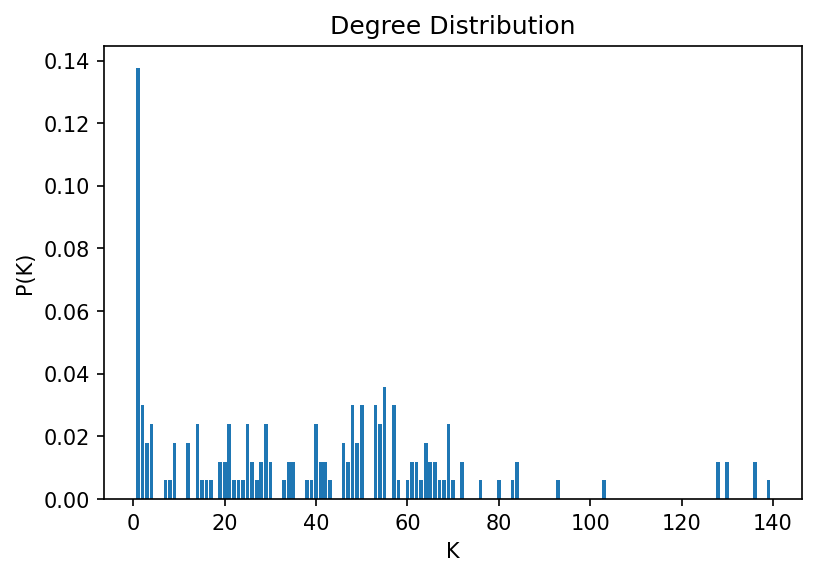

In [9]:
from matplotlib import pyplot as plt


plt.figure().set_dpi(150)
plt.title("Degree Distribution")
plt.xlabel("K")
plt.ylabel("P(K)")
plt.bar(counter.keys(), counter.values())
plt.show()


In [10]:
print (t)

Nodes:			167
Time-stamped links:	82875
Links/Nodes:		496.25748502994014
Observation period:	[1, 57790]
Observation length:	 57789 
Time stamps:		 57790 
Avg. inter-event dt:	 1.0
Min/Max inter-event dt:	 1/1


In [12]:
import numpy as np
from numpy import var
from numpy import mean

iteration_val = np.zeros(57792)

nodes = np.zeros(168)
nodes[166] = 1
for t in range(57791):
    timestep_nodes = data[data[:,2]==t]
    infected_nodes = np.where(nodes > 0)[0]
    for i in infected_nodes:
        for j in range(len(timestep_nodes)):
            if (timestep_nodes[j][0] == i):
                nodes[timestep_nodes[j][1]] = 1
            elif (timestep_nodes[j][1] == i):
                nodes[timestep_nodes[j][0]] = 1
    iteration_val[t] = len(infected_nodes)




print iteration_val(57791)
                
 
    

SyntaxError: invalid syntax (1711219967.py, line 23)

In [13]:
import numpy as np
from numpy import var
from numpy import mean

iteration_values = np.zeros((57792,168))




for n in range(1,168):
    nodes = np.zeros(168)
    nodes[n] = 1
    position_time = 0;
    for t in range(57791):
        timestep_nodes = [];
        while (data[position_time,2]==t):
            timestep_nodes.append(data[position_time,:])
            position_time+=1

        
        infected_nodes = np.where(nodes > 0)[0]
        for i in infected_nodes:
            for j in range(len(timestep_nodes)):
                if (timestep_nodes[j][0] == i):
                    nodes[timestep_nodes[j][1]] = 1
                elif (timestep_nodes[j][1] == i):
                    nodes[timestep_nodes[j][0]] = 1
        iteration_values[t,n] = len(infected_nodes)
        
    print(n)



print (iteration_values[:,0])
print (iteration_values[:,10]) 
print (iteration_values[:,20]) 
                

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
[0. 0. 0. ... 0. 0. 0.]
[  1.   1.   2. ... 167. 167.   0.]
[  1.   1.   1. ... 167. 167.   0.]


<Figure size 600x400 with 0 Axes>

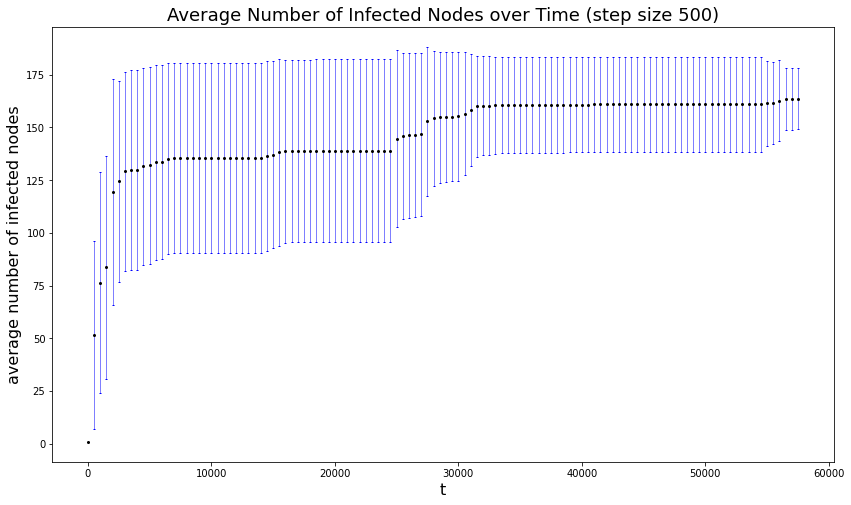

In [69]:
from numpy import var
from numpy import mean
import math
mean_values = np.zeros(57791)
std_values = np.zeros(57791)
for t in range(57791):
    mean_values[t] = mean(iteration_values[t,:])
    std_values[t] = math.sqrt(var(iteration_values[t,:]))
    
x = list(range(1, 57791,500))

plt.figure().set_dpi(100)
plt.figure(figsize=(14,8))

plt.title("Average Number of Infected Nodes over Time (step size 500)", fontsize=18)
plt.xlabel("t", fontsize=16)
plt.ylabel("average number of infected nodes", fontsize=16)
#plt.scatter(x, mean_values[0:57791:1000])
plt.errorbar(x, mean_values[1:57791:500], std_values[1:57791:500], fmt = 'o',color = 'black', 
            ecolor = 'blue', elinewidth = 0.5, capsize=1, markersize=2.)
plt.show()

